# Support Vector Machines
We will discuss the usage of SVMs in classification problems.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Create a random dataset
from sklearn.datasets.samples_generator import make_blobs

### TODO: generate samples using make_blobs ###
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1)

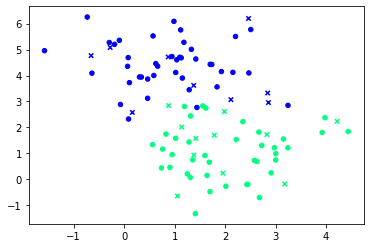

In [0]:
# Splitting dataset to a train set and test set
from sklearn.model_selection import train_test_split

### TODO: split the generated samples using train_test_split ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], s=20, cmap='winter', c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], s=20, cmap='winter', c=y_test, marker='x')

In [0]:
# Fitting a model
from sklearn.svm import SVC

### TODO: fit an SVM classifier to generated samples with linear kernel ###
model = SVC(kernel='linear', C=1e2)
model.fit(X_train, y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

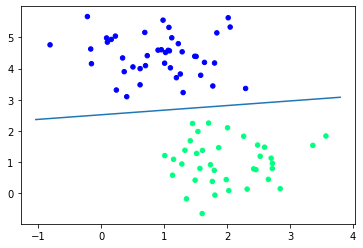

In [0]:
# Plotting the SVM decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='winter')

ax = plt.gca()
xlim = ax.get_xlim()

### TODO: plot the boundary ###
# y = ax + b | w0.x0 + w1.x1 + b = 0 -> x1 = (- w0.x0 - b) / w1

xx = np.linspace(xlim[0], xlim[1])
w = model.coef_[0]
b = model.intercept_[0]
yy = -w[0] / w[1] * xx - b / w[1]

plt.plot(xx, yy)

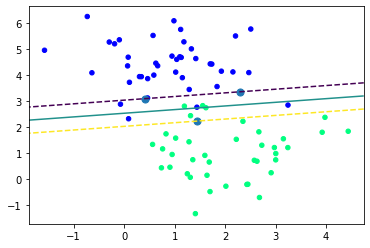

In [0]:
# Plotting the SVM decision boundary with margins
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='winter')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

### TODO: plot the boundary and the margins (with support vectors) ###
xx = np.linspace(xlim[0], xlim[1])
yy = np.linspace(ylim[0], ylim[1])
X, Y = np.meshgrid(xx, yy)
xy = np.vstack([X.ravel(), Y.ravel()]).T

D = model.decision_function(xy).reshape(X.shape)

ax.contour(X, Y, D, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50)

In [0]:
# Accuracy on testing data
from sklearn.metrics import accuracy_score

### TODO: print the accuracy on testing and training data ###
print(accuracy_score(y_test, model.predict(X_test)))
print(accuracy_score(y_train, model.predict(X_train)))

0.95
0.95
